# EJEMPLO ANÁLISIS PARA IMF
## Big Data & Business Analytics

### Juan Manuel Moreno Lamparero

## Análisis exploratorio de un Data Set
Durante el desarrollo de esta práctica se explicará todo el proceso EDA realizado en un Data Set que haya sido resultante de interés, incluyendo la fuente y la extracción del mismo.

### Obtención del Data Set y proceso de limpieza de datos
En esta ocasión se ha optado por la realización de un Data Set propio mediante la recopilación de varios archivos .csv que tenéiendo una estructura prácticamente homogénea pueden concatenarse en un único archivo.

El Data Set que se persigue obtener es datos sobre las multas impuestas a conductores en la Comunidad de Madrid durante el periodo de Diciembre de 2016 y Septiembre de 2014 (ambos períodos inclusive). Para la obtención de los diferentes archivos .csv hemos utilizado como recurso Open Data que la Comunidad de Madrid pone a disposición del ciudadano para poder realizar nuestros análisis libremente. La web sobre la que podemos consultar los datos abiertos es: http://datos.madrid.es/portal/site/egob y, concretamente el link que nos lleva a los datos con las multas de circulación es: http://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

Dentro del último link podemos ver una descripción detallada de la información que contienen los datos, en nuestro caso tenemos información de todas las multas de circulación que el Ayuntamiento de Madrid tramita cada mes. Por motivos referentes a protección de datos las variables informan únicamente de la infracción y está prohibido realizar labores de re-identificación personal de la información de los infractores.

Vemos que los datos disponibles para descarga y consulta están dividos en:
* Año Mes
    * Detalle: Descargar fichero en .txt o .csv
    * Agrupadas-excluidas: Descargar fichero en .txt o .csv
  
Para nuestro caso de estudio sólo vamos a descargar los archivos con extensión .csv que provengan de la categoría "Detalle".


Como primera toma de contacto y, para mostrar información sobre las columnas que tienen los archivos mostraremos el csv como data frame de los datos referentes a 2016.

In [1]:
#Importamos la librería pandas para obtener data frames
import pandas as pd

#Abrimos el csv de 2016 y lo pasamos a data frame
multas_dic_2016_ejemplo = pd.read_csv("201612_detalle.csv", delimiter=";")
#Mostramos los 5 primeros registros
multas_dic_2016_ejemplo.head(5)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y
0,LEVE,GANADERIA SN PARKING,12,2016,10.20,90.0,SI,0,POLICIA MUNICIPAL,"ORDENAR EL ESTACIONAMIENTO, CORTAR LA CIRCULAC...",,,,
1,LEVE,AV MONFORTE DE LEMOS 2,12,2016,11.21,90.0,SI,0,SER,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,,,,
2,LEVE,CASTILLA 1,12,2016,9.12,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACI�N NO V�LIDA. ...,,,,
3,GRAVE,"M 30 KM 22,200 CALZADA 2",12,2016,8.52,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,70,95,,
4,LEVE,SANTA JULIANA 1,12,2016,13.23,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SE�A...,,,,


Mostramos las columnas y la dimensión del data frame

In [2]:
print "Columnas del data frame"
print multas_dic_2016_ejemplo.columns
print "\n"
print "Dimensiones del data frame"
print multas_dic_2016_ejemplo.shape

Columnas del data frame
Index([u'CALIFICACION', u'LUGAR', u'MES', u'ANIO', u'HORA', u'IMP_BOL',
       u'DESCUENTO', u'PUNTOS', u'DENUNCIANTE', u'HECHO-BOL', u'VEL_LIMITE',
       u'VEL_CIRCULA', u'COORDENADA_X', u'COORDENADA_Y'],
      dtype='object')


Dimensiones del data frame
(211752, 14)


### Información de las variables

Como hemos visto el data frame contiene 14 variables que tienen el siguiente significado:
* __CALIFICACION__: Importancia o gravedad de la infracción cometida.
* __LUGAR__: Localización en la que se produjo la infracción.
* __MES + ANIO + HORA__: Fecha en la que el conductor fué sancionado.
* __IMP_BOL__: Importe de la sanción.
* __DESCUENTO__: Reducción sobre el precio de la infracción (50% - Siempre que se pague en el plazo de tiempo establecido en la Ley de Seguridad Vial), si se considera que pueda tener reducción.
* __PUNTOS__: Número de puntos que acarrea la sanción sobre el carnet de conducir del infractor.
* __DENUNCIANTE__: Agente del organismo público encargado de la regulación de la circulación de la Comunidad de Madrid que impone la denuncia al infractor.
* __HECHO_BOL__: Motivo o causa por la que el conductor es sancionado.
* __VEL_LIMITE__: Velocidad máxima permitida de la vía por la que el conductor transitaba al realizar la infracción.
* __VEL_CIRCULA__: Velocidad a la que el conductor transitaba la vía en la que ha sido sancionado.
* __COORDENADA_X__: Punto geográfico (X) que identifica al infractor en infracciones derivadas de rebasar un semáforo en fase roja, o no respetar las señales en una vía de circulación restringida o reservadas.

Tipología de las variables

In [3]:
print "Tipo de dato por variable: \n"
print multas_dic_2016_ejemplo.dtypes

Tipo de dato por variable: 

CALIFICACION     object
LUGAR            object
MES               int64
ANIO              int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS            int64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE       object
VEL_CIRCULA      object
COORDENADA_X     object
COORDENADA_Y     object
dtype: object


Una vez que hemos visto la estructura general del data frame, hemos de nombrar las primeras anomalías detectadas:
* En las columnas VEL_LIMITE y VEL_CIRCULA, no aparecen valores, esto se debe a que la infracción no se produjo por ningún hecho que tuviera que ver con rebasar ningún límite de velocidad por lo que en las próximas extracciones de los csv trataremos estos espacios en blanco como valores nulos y, posteriormente consideraremos que la infracción se produjo a 0 kilómetros por hora, para no borrar todas las columnas con valores nulos.
* Se ha detectado que las columnas COORDENADA_X y COORDENADA_Y sólo aparecen a partir de marzo de 2016, por lo que al no tratarse de columnas comunes, para respetar la dimensionalidad de los datos borraremos estas columnas para todos los csv.

Una vez que conocemos la estructura del data set, los datos y los posibles problemas o anomalías detectadas, pasaremos a la descarga de todos los archivos csv con el detalle de las multas y los concatenaremos en un solo data frame.

Para descargar todos los csv, al no seguir ninguna distribución lógica las url, no podemos automatizar la descarga, por lo que se han recopilado todas las url para descargarse posteriormente los csv.

El archivo en cuestión es:

In [4]:
urls_multas = pd.read_csv("Url_multas.csv",delimiter=";")
urls_multas

,ANIO,MES,URL
0,2016,Diciembre,http://datos.madrid.es/egob/catalogo/210104-12...
1,2016,Noviembre,http://datos.madrid.es/egob/catalogo/210104-12...
2,2016,Octubre,http://datos.madrid.es/egob/catalogo/210104-11...
3,2016,Septiembre,http://datos.madrid.es/egob/catalogo/210104-11...
4,2016,Agosto,http://datos.madrid.es/egob/catalogo/210104-11...
5,2016,Julio,http://datos.madrid.es/egob/catalogo/210104-10...
6,2016,Junio,http://datos.madrid.es/egob/catalogo/210104-10...
7,2016,Mayo,http://datos.madrid.es/egob/catalogo/210104-98...
8,2016,Abril,http://datos.madrid.es/egob/catalogo/210104-13...
9,2016,Marzo,http://datos.madrid.es/egob/catalogo/210104-13...


Una vez que tenemos los target para la descarga, obtenemos el data frame general.

### Obtencióm del data frame
__Descarga de todos los archivos .csv__

In [5]:
#Importamos la librería para poder descargar los csv
import urllib

#Importamos time para obtener el tiempo que se tarda en descargar todos los csv
import time
start_time = time.time()

#Descargamos todos los csv
for i in range(len(urls_multas["URL"])):
    print "----------------------------------------------"
    print "Descargando .csv con las multas del periodo: ",str(urls_multas["ANIO"][i]),"/"+str(urls_multas["MES"][i])
    urllib.urlretrieve(urls_multas["URL"][i], str("multas")+str(i)+str(".csv"))

print 'Tiempo total en descargar los .csv',((time.time() - start_time)/60)," minutos"

----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Diciembre
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Noviembre
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Octubre
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Septiembre
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Agosto
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Julio
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Junio
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Mayo
----------------------------------------------
Descargando .csv con las multas del periodo:  2016 /Abril
----------------------------------------

__Concatenamos los csv y obtenemos el data frame global__

In [6]:
#Evitamos warning al realizar operaciones el columnas
import warnings 
warnings.filterwarnings("ignore")
#Obtenemos el tiempo que tarda en obtenerse el data frame
start_time = time.time()

#Creamos un data frame en el que vamos a introducir todos los .csv secuencialmente
data_multas = pd.DataFrame()

#Lista provisional en la que introducir los data frame que posteriormente se 
#  concatenan en el data frame global con todos los datos de las multas de la comunidad 
#  de Madrid entre los años 2016, 2015 así como 2014 hasta septiembre (incluido)
lista_csv_multas = []

#Iteramos para pasar a pandas data frame cada csv detectando los NaN values
for i in range(len(urls_multas["URL"])):
    data = pd.read_csv(str("multas")+str(i)+str(".csv"), delimiter=";", na_values=("           ","   "))
    #Quitamos todas las columnas que sean de coordenadas
    for col in data:
        if "COORDENADA" in col:
            data.drop(col,1,inplace=True)
    #Añadimos cada data frame a la lista
    lista_csv_multas.append(data)
#Obtenemos el data frame global
data_multas = pd.concat(lista_csv_multas)
print "--------------------------------"
print 'Tiempo en obtener el archivo data frame',(time.time() - start_time)

--------------------------------
Tiempo en obtener el archivo data frame 69.9739999771


In [7]:
#Mostramos las primeras 10 posiciones del data frame
data_multas.head(10)

,PUNTOS,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_CIRCULA,VEL_LIMITE
0,NaN,2016.0,LEVE,POLICIA MUNICIPAL,SI,"ORDENAR EL ESTACIONAMIENTO, CORTAR LA CIRCULAC...",10.2,90.0,GANADERIA SN PARKING,12,0,NaN,NaN,NaN
1,NaN,2016.0,LEVE,SER,SI,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,11.21,90.0,AV MONFORTE DE LEMOS 2,12,0,NaN,NaN,NaN
2,NaN,2016.0,LEVE,SER,SI,ESTACIONAR CON AUTORIZACI�N NO V�LIDA. ...,9.12,60.0,CASTILLA 1,12,0,NaN,NaN,NaN
3,NaN,2016.0,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,8.52,100.0,"M 30 KM 22,200 CALZADA 2",12,0,95,NaN,70
4,NaN,2016.0,LEVE,SER,SI,ESTACIONAR EN LUGAR PROHIBIDO DEBIDAMENTE SE�A...,13.23,90.0,SANTA JULIANA 1,12,0,NaN,NaN,NaN
5,NaN,2016.0,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12.31,100.0,"M 30 KM 0,200 CALZADA 2",12,0,81,NaN,70
6,NaN,2016.0,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12.37,100.0,"M 30 KM 27,400 CALZADA 2",12,0,99,NaN,70
7,NaN,2016.0,LEVE,SER,SI,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,11.43,90.0,AV MONFORTE DE LEMOS 2,12,0,NaN,NaN,NaN
8,NaN,2016.0,LEVE,AGENTES DE MOVILIDAD,SI,"ESTACIONAR VEHICULO DE DOS RUEDAS EN PLAZA, ZO...",20.48,30.0,MONTERA 48,12,0,NaN,NaN,NaN
9,NaN,2016.0,LEVE,SER,SI,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,12.26,90.0,AV MONFORTE DE LEMOS 3,12,0,NaN,NaN,NaN


Como podemos observar hay dos columnas que se refieren a los puntos de pérdida al realizar una infracción. Una de ellas tiene todos sus valores como nulos. Sin embargo, la otra columna que es exactamente igual conserva la estructura mencionada anteriormente por lo que borraremos la columna con todos sus valores a nulo.

Del mismo ocurre con VEL_CIRULA, borramos la segunda columna con dicho nombre.

In [8]:
#Borramos la columna ambigua "PUNTOS"
data_multas = data_multas.drop(data_multas.columns[[0,12]], axis=1) 
#Comprobamos si persiste la columna
data_multas.head(2)

,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_LIMITE
0,2016.0,LEVE,POLICIA MUNICIPAL,SI,"ORDENAR EL ESTACIONAMIENTO, CORTAR LA CIRCULAC...",10.2,90.0,GANADERIA SN PARKING,12,0,NaN,NaN
1,2016.0,LEVE,SER,SI,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,11.21,90.0,AV MONFORTE DE LEMOS 2,12,0,NaN,NaN


Cambiamos los valores nulos de las columnas VEL_CIRULA y VEL_LIMITE por 0

In [9]:
vel_circula = data_multas[["VEL_CIRCULA"]].fillna(0)
vel_limite = data_multas[["VEL_LIMITE"]].fillna(0)
data_multas[["VEL_CIRCULA"]] = vel_circula
data_multas[["VEL_LIMITE"]] = vel_limite
data_multas.head(2)

,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_LIMITE
0,2016.0,LEVE,POLICIA MUNICIPAL,SI,"ORDENAR EL ESTACIONAMIENTO, CORTAR LA CIRCULAC...",10.2,90.0,GANADERIA SN PARKING,12,0,0,0
1,2016.0,LEVE,SER,SI,ESTACIONAR INCUMPLIENDOLAS RESTRICCIONES ESTAB...,11.21,90.0,AV MONFORTE DE LEMOS 2,12,0,0,0


Comprobamos si hay datos nulos

In [10]:
print "*CANTIDAD de datos nulos por columna en el data frame"
print(data_multas.isnull().sum())
print "----------------------------------"
print "*PORCENTAJE de datos nulos por columna en el data frame"
print(data_multas.isnull().sum()/len(data_multas)*100)

*CANTIDAD de datos nulos por columna en el data frame
ANIO                 1
CALIFICACION         0
DENUNCIANTE     626385
DESCUENTO            1
HECHO-BOL       626385
HORA                 1
IMP_BOL              1
LUGAR                1
MES                  1
PUNTOS          211506
VEL_CIRCULA          0
VEL_LIMITE           0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el data frame
ANIO             0.000018
CALIFICACION     0.000000
DENUNCIANTE     11.258006
DESCUENTO        0.000018
HECHO-BOL       11.258006
HORA             0.000018
IMP_BOL          0.000018
LUGAR            0.000018
MES              0.000018
PUNTOS           3.801394
VEL_CIRCULA      0.000000
VEL_LIMITE       0.000000
dtype: float64


Como podemos comprobar hay nulos en prácticamente todas las columnas. Sin embargo, para tratar de mantener en la medida de lo posible la consistencia de los datos, vamos a centranos en el supuesto de que todos los conductores que tienen la columna PUNTOS en NaN, tengan una sanción de 0 puntos, aunque esto posbilemente dependiendo del tipo de sanción de cada conductor sea inapropiado e injusto para otros conductores con una misma sanción y con pérdida del puntos.

In [11]:
puntos = data_multas[["PUNTOS"]].fillna(0)
data_multas[["PUNTOS"]] = puntos

Ahora sí, borramos los valores nulos

In [12]:
data_multas = data_multas.dropna()
#Comprobamos la cantidad de datos restantes (dimensiones)
print "Dimensiones del Data Frame"
print data_multas.shape

Dimensiones del Data Frame
(4937522, 12)


Como podemos comprobar finalmente trabajamos con __4937522 filas__ y __12 columnas__

Sin embargo. Aunque parezca que hemos realizado el proceso de limpieza de datos completo, aún quedan algunas anomalías detectadas. Entre ellas, el índice de columnas al haber realizado un proceso de concatenado de varios data frames, se duplica tantas veces como los distitntos data frames compartan el índice. En nuestro caso sólo queremos un único índice para todas las filas por lo que lo cambiaremos.

In [13]:
#Reemplazamos el índice de filas por la longitud total del data frame.
data_multas.index = range(len(data_multas))

Realizando un estudio previo sobre las columnas temporales, se ha detectado que en algunos casos en la columna de "MES", aparece su valor como literal en lugar de numéricamente, cambiamos todos los valores literales por su dígito mensual.

In [14]:
data_multas.groupby('MES').count()

,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,PUNTOS,VEL_CIRCULA,VEL_LIMITE
MES,,,,,,,,,,,
0.0,109,109,109,109,109,109,109,109,109,109,109
0.01,126,126,126,126,126,126,126,126,126,126,126
0.02,110,110,110,110,110,110,110,110,110,110,110
0.03,118,118,118,118,118,118,118,118,118,118,118
0.04,131,131,131,131,131,131,131,131,131,131,131
0.05,105,105,105,105,105,105,105,105,105,105,105
0.06,116,116,116,116,116,116,116,116,116,116,116
0.07,122,122,122,122,122,122,122,122,122,122,122
0.08,114,114,114,114,114,114,114,114,114,114,114


Cambiamos estos valores literales.

In [15]:
data_multas[data_multas["MES"]== 'DICIEMBRE'] = 12
data_multas[data_multas["MES"]== 'ENERO'] = 1
data_multas[data_multas["MES"]== 'FEBRERO'] = 2
data_multas[data_multas["MES"]== 'NOVIEMBRE'] = 11
data_multas[data_multas["MES"]== 'OCTUBRE'] = 10
data_multas[data_multas["MES"]== 'SEPTIEMBRE'] = 9

Del mismo modo en las columnas CALIFICACION y DENUNCIANTE se han detectado anomalías en sus valores literales, lo corregimos

In [16]:
data_multas = data_multas.replace(['GRAVE     ', 'LEVE      ', 'MUY GRAVE '],
                                   ['GRAVE', 'LEVE','MUY GRAVE' ])

data_multas = data_multas.replace(['POLICIA MUNICIPAL   ', 'SACE                ', 'SER                 '],
                                   ['POLICIA MUNICIPAL', 'SACE','SER'])


En la columna HORA, comprobamos que hay una hora que no tiene ninguna significancia en 0 - 24, el valor es 'SI'. Lo borramos.

In [17]:
data_multas.groupby('HORA').count()

,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_LIMITE
HORA,,,,,,,,,,,
0.0,939,939,939,939,939,939,939,939,939,939,939
0.01,924,924,924,924,924,924,924,924,924,924,924
0.02,949,949,949,949,949,949,949,949,949,949,949
0.03,895,895,895,895,895,895,895,895,895,895,895
0.04,863,863,863,863,863,863,863,863,863,863,863
0.05,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
0.06,885,885,885,885,885,885,885,885,885,885,885
0.07,857,857,857,857,857,857,857,857,857,857,857
0.08,936,936,936,936,936,936,936,936,936,936,936


In [18]:
data_multas = data_multas[~data_multas['HORA'].isin(['SI'])]

Otra nueva anomalía que ha surgido es que las columnas con tipos temporales que son ANIO HORA y MES han tomado valores Double, lo cuál no es correcto (en el caso de la hora podría ser correcto, pero tomaremos el valor como entero), por lo que truncaremos dichas variables. 

Una vez que tenemos todos los valores numéricos los pasamos a enteros para realizar las últimas transformaciones.

In [19]:
data_multas[['ANIO', 'MES', "HORA"]] = data_multas[['ANIO', 'MES', "HORA"]].astype(int)

Comprobamos los nuevos tipos

In [20]:
print data_multas.dtypes

ANIO              int32
CALIFICACION     object
DENUNCIANTE      object
DESCUENTO        object
HECHO-BOL        object
HORA              int32
IMP_BOL         float64
LUGAR            object
MES               int32
PUNTOS           object
VEL_CIRCULA      object
VEL_LIMITE       object
dtype: object


Resolvemos las anomalías presentes en la columna ANIO

In [21]:
data_multas.groupby('ANIO').count()

,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_LIMITE
ANIO,,,,,,,,,,,
1,179741,179741,179741,179741,179741,179741,179741,179741,179741,179741,179741
2,177974,177974,177974,177974,177974,177974,177974,177974,177974,177974,177974
9,183800,183800,183800,183800,183800,183800,183800,183800,183800,183800,183800
10,201401,201401,201401,201401,201401,201401,201401,201401,201401,201401,201401
11,188836,188836,188836,188836,188836,188836,188836,188836,188836,188836,188836
12,184501,184501,184501,184501,184501,184501,184501,184501,184501,184501,184501
2015,1741760,1741760,1741760,1741760,1741760,1741760,1741760,1741760,1741760,1741760,1741760
2016,1902947,1902947,1902947,1902947,1902947,1902947,1902947,1902947,1902947,1902947,1902947


In [22]:
#Quitamos todos los años restantes que tengan un formato incorrecto
data_multas = data_multas[data_multas.ANIO >= 2015]

Como podemos observar al realizar el proceso de limpieza de datos ha terminado despareciendo el año 2014. El data frame final con el que vamos a trabajar en el análisis exploratorio es de las siguientes dimensiones:

In [23]:
print "Dimensiones finales del data frame:", data_multas.shape

Dimensiones finales del data frame: (3644707, 12)


## Análisis del data frame

A continuación, se realizarán operaciones para extraer información que pueda ser interesante sobre las infracciones registradas que han cometido los conductores en Madrid capital. 

Un primer análisis puede ser que año se han obtenido más multas:

Podemos obtener quiénes han sido los infractores que han sido denunciados a una mayor velocidad:

In [24]:
print "Conductores denunciados a una mayor velocidad"
data_multas.sort_values("VEL_CIRCULA", ascending=False).head(20)

Conductores denunciados a una mayor velocidad


,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_LIMITE
3461282,2015,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,6,500.0,"M-30 C-1 KM 0,500 CR-CRA",5,6,158,90
684666,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,23,500.0,"M-30 C-2 KM 7,800 CR-IZD",10,6,158,90
2079518,2015,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,16,500.0,"M 30 KM 6,700 CALZADA 1",12,6,158,90
3818670,2015,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,0,500.0,"M-30 C-1 KM 6,700 CR3",3,6,158,90
395151,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,23,500.0,"M-30 C-2 KM 7,800 CR-IZD",11,6,158,90
679275,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,2,500.0,"M-30 C-1 KM 6,700 CR3",10,6,158,90
1915486,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,4,500.0,"M-30 C-1 KM 0,500 CR-IZD",2,6,157,90
3090764,2015,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,2,500.0,"M-30 C-1 KM 6,700 CR3",7,6,157,90
2280791,2015,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,0,500.0,"M-30 C-1 KM 6,700 CR3",12,6,157,90
2481032,2015,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,13,500.0,M-30 CALZADA 2 KM 27.000,11,6,156,90


Como podemos comprobar la velicidad a la que fueron captados estos infractores oscila entre 158 y 155 en vías cuya circulación máxima permitida es 90Km/h. Por lo cuál, estos conductores cirulaban aproximadamente un 75% más rápido de lo debido. Cabe destacar que en todos los casos el hecho por el cuál se multa a los conductores es "Sobrepasar la velocidad máxima en vías limitadas", todas las multas han sido realizadas por agentes de la Policía Municipal de Madrid y en todos casos la pérdida de puntos es de 6 un importe de 500€ y la posibilidad de reducción.

Viendo esta situación podemos extraer el caso contrario, es decir, la velocida a la que circulaban mínima que fue motivo de multa, para ello hemos de excluir las multas de estacionamiento.

In [25]:
#Filtramos por velocidad de circulación != 0
data_multas_no_parking = data_multas[data_multas["VEL_CIRCULA"] != 0]

print "Conductores denunciados a una velociadad muy semejante a la máxima permitida en la vía"
data_multas_no_parking.sort_values("VEL_CIRCULA", ascending=True).head(20)

Conductores denunciados a una velociadad muy semejante a la máxima permitida en la vía


,ANIO,CALIFICACION,DENUNCIANTE,DESCUENTO,HECHO-BOL,HORA,IMP_BOL,LUGAR,MES,PUNTOS,VEL_CIRCULA,VEL_LIMITE
440677,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,31,20
440661,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,31,20
440684,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,31,20
440679,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,31,20
440693,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,32,20
440705,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,32,20
321338,2016,GRAVE,AGENTES DE MOVILIDAD,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,16,100.0,F055 SEGOVIA,11,0,33,30
321333,2016,GRAVE,AGENTES DE MOVILIDAD,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,16,100.0,F055 SEGOVIA,11,0,33,30
440672,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,33,20
440674,2016,GRAVE,POLICIA MUNICIPAL,SI,SOBREPASAR LA VELOCIDADM�XIMA EN V�AS LIMITADA...,12,100.0,S/N PO PI�ONERO,11,0,33,20


Tras los resultados expuestos podemos extraer, que en vías por la que la circulación debe ser a 20Km/h, se considera que un conductor puede tener una leve distracción e ir más de 10Km/h por encima de lo debido, ya que la multa impuesta que tiene la velocidad mínima es de 31Km/h en una vía cuya cirulación era de 20, en este caso al tratarse de una diferencia de velocidad menor (Aunque los conductores en estos casos van a un 75% más rápido de lo debido), el importe de la multa es de 100€. Sin embargo, en este escenario, no sólo nos encontramos a la Policía Municipal, sino a agentes de movilidad. 

Tras este primer análisis por velocidad, podemos extraer el año en el que más infracciones se han realizado.

In [26]:
from collections import Counter

#Obtenemos el año que más se multa
Counter(data_multas["ANIO"])

Counter({2015: 1741760, 2016: 1902947})

Como podemos ver en 2016 existe un mayor número de multas, vamos a ver como se comporta esta tendencia mes a mes

Multas de 2015


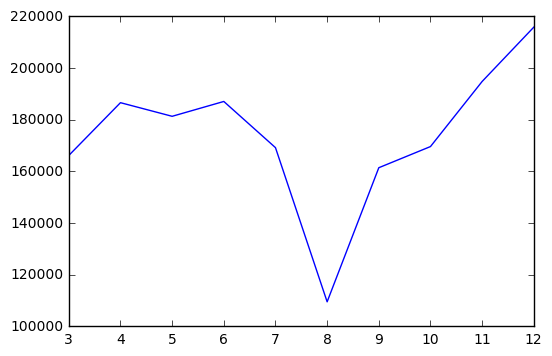

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

#Filtramos por año 2015
data_multas_2015 = data_multas[data_multas["ANIO"] == 2015]

print "Multas de 2015"
plt.plot(data_multas_2015[["ANIO", "MES"]].groupby("MES").count())

Multas de 2016


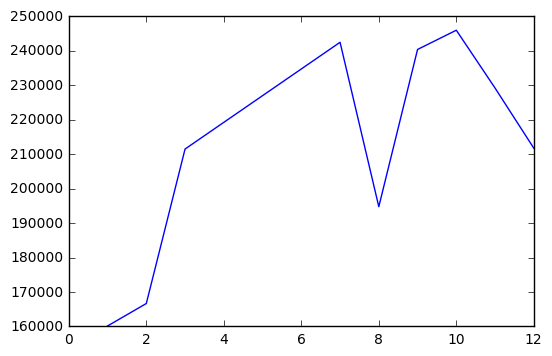

In [28]:
#Filtramos por año 2016
data_multas_2016 = data_multas[data_multas["ANIO"] == 2016]

print "Multas de 2016"
plt.plot(data_multas_2016[["ANIO", "MES"]].groupby("MES").count())

En este caso hay un gran hecho que es similar en ambas gráficas y es que, en los meses de verano aproximadamente entre Julio-Septiembre, se produce un gran descenso del número de multas que se realizan en Madrid, esto es debido principalmente a las vacaciones de verano por lo que hay menos conductores en la capital. Sin embargo, el mes que menos multas hay es enero y, el que más multas hay es diciembre

In [29]:
pd.crosstab(index=data_multas["MES"], columns="count")

col_0,count
MES,
1,160137
2,166657
3,377699
4,186619
5,181346
6,187089
7,411712
8,304310
9,401856


y, del mismo modo extraer otra serie de estadísticas como:

La frecuencia de actuación por los organismos de seguridad y ver cuál de ellos es más activo.

In [30]:
print "Cantidad de sanciones impuestas por los distintos agentes en Madrid"
print pd.crosstab(index=data_multas["DENUNCIANTE"], columns="count")
print "-------------------------------"
print "Porcentaje de sanciones impuestas por los distintos agentes en Madrid"
print (pd.crosstab(index=data_multas["DENUNCIANTE"], columns="count")/len(data_multas) * 100)

Cantidad de sanciones impuestas por los distintos agentes en Madrid
col_0                   count
DENUNCIANTE                  
AGENTES DE MOVILIDAD   724543
POLICIA MUNICIPAL     1015340
SACE                    28374
SER                   1876450
-------------------------------
Porcentaje de sanciones impuestas por los distintos agentes en Madrid
col_0                     count
DENUNCIANTE                    
AGENTES DE MOVILIDAD  19.879321
POLICIA MUNICIPAL     27.857932
SACE                   0.778499
SER                   51.484248


Podemos ver que los agentes del SER (Servicio de Estacionamiento Regulado) son los quienes más sanciones imponene teniendo más de un 51%, seguidos de la Policía Municpal de Madrid.

Que sean los agentes del Ser los agentes que más denuncias realizan, esto quiere decir que más de la mitad de las infracciones son a una velocidad de 0Km/h, o lo que es lo mismo multas de esatacionamiento y derivados.

Por consiguiente, podemos realizar análisis similares como obtener el total de infracciones por su calificación.

In [31]:
print "Cantidad total de sanciones por su califiación"
print pd.crosstab(index=data_multas["CALIFICACION"], columns="count")
print "-------------------------------"
print "Porcentaje de sanciones por su califiación"
print (pd.crosstab(index=data_multas["CALIFICACION"], columns="count")/len(data_multas) * 100)

Cantidad total de sanciones por su califiación
col_0           count
CALIFICACION         
GRAVE         1100391
LEVE          2530091
MUY GRAVE       14225
-------------------------------
Porcentaje de sanciones por su califiación
col_0             count
CALIFICACION           
GRAVE         30.191480
LEVE          69.418228
MUY GRAVE      0.390292


Afortunadamente, aunque son sanciones, prácticamente un 70% de las mimas han sido sanciones leves, es decir, no han supuesto ningún peligro importante para la seguridad vial.

Otro análisis similar que puede ser interante es ver cuál es la media de puntos que tiene las sanciones que reciben los conductores infractores y que cantidad/porcentaje de los mismos existe.

In [32]:
print "Media de puntos perdidos por los conductores de Madrid en infracciones de tráfico: ", data_multas["PUNTOS"].mean()

Media de puntos perdidos por los conductores de Madrid en infracciones de tráfico:  0.140131977687


El resultado obtenido vuelve a reflejar que ni siquiera los infractores pierden un punto de media por sanción, esto vuelve a resaltar la gran  cantidad de multas impuestas por estacionamiento. A continuación, veremos sus totales y porcenajes.

In [33]:
print "Cantidad total de puntos que pierden los conductores por infracción"
print pd.crosstab(index=data_multas["PUNTOS"], columns="count")
print "-------------------------------"
print "Porcentaje de puntos que pierden los conductores por infracción"
print (pd.crosstab(index=data_multas["PUNTOS"], columns="count")/len(data_multas) * 100)

Cantidad total de puntos que pierden los conductores por infracción
col_0     count
PUNTOS         
0       3490975
2         53465
3         21052
4         67318
6         11897
-------------------------------
Porcentaje de puntos que pierden los conductores por infracción
col_0       count
PUNTOS           
0       95.782048
2        1.466922
3        0.577605
4        1.847007
6        0.326419


Además también resulta interesante ver cuál es la velocidad más repetida a la que nos conductores han sido multados. Como se ha realizado anteriormente, exluiremos las multas con velocidad 0.

Velocidad límite que registra más multas
col_0        count
VEL_LIMITE        
20.0            62
30.0           103
40.0         10976
50.0        130524
60.0          6855
70.0        388887
80.0          2251
90.0        145432
-------------------------------
Porcentaje de velocidad límite que registra más multas
col_0           count
VEL_LIMITE           
20.0         0.001701
30.0         0.002826
40.0         0.301149
50.0         3.581193
60.0         0.188081
70.0        10.669911
80.0         0.061761
90.0         3.990225


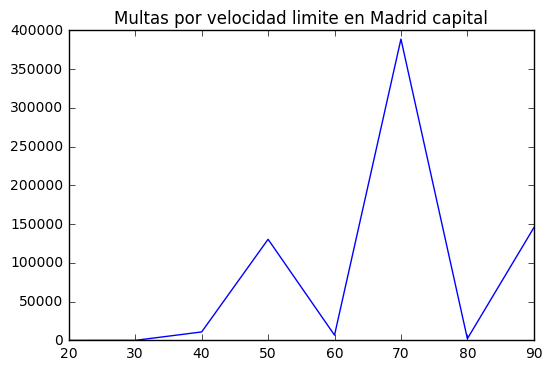

In [34]:
print "Velocidad límite que registra más multas"
print pd.crosstab(index=data_multas_no_parking["VEL_LIMITE"], columns = "count")
print "-------------------------------"
print "Porcentaje de velocidad límite que registra más multas"
print (pd.crosstab(index=data_multas_no_parking["VEL_LIMITE"], columns = "count")/len(data_multas) * 100)

#Mostramos gráfica 
plt.title("Multas por velocidad limite en Madrid capital")
graf = plt.plot(pd.crosstab(index=data_multas_no_parking["VEL_LIMITE"], columns = "count"))
plt.show()

Ahora constriuremos un gráfico incluyendo todas las velocidades para ver la diferencia de las multas de estacionamiento con el resto.

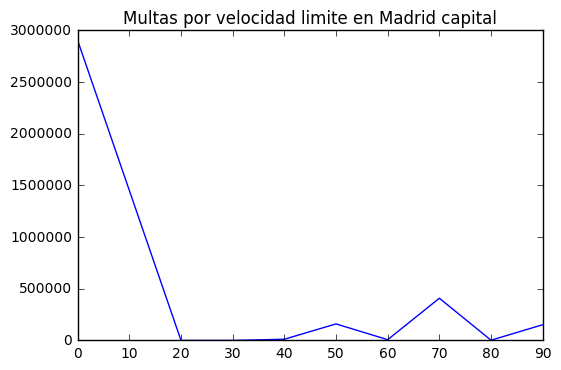

In [35]:
#Mostramos gráfica 
plt.title("Multas por velocidad limite en Madrid capital")
plt.plot(pd.crosstab(index=data_multas["VEL_LIMITE"], columns = "count"))
plt.show()

Podemos ver que la diferencia es muy significativa.

Finalmente siguiendo con los análisis referentes a frecuencias vamos a obtener en qué momento se han realizado más infracciones y si coincide con los periodos en los que es hora punta en Madrid capital.

Hora en la que se registran más multas
col_0   count
HORA         
0       57007
1       41001
2       27623
3       20428
4       17686
5       18443
6       24280
7       34077
8       69153
9      288174
10     346038
11     328984
12     280823
13     350819
14     249663
15     172312
16     217518
17     266340
18     234282
19     216846
20     186498
21      79261
22      62309
23      55142
-------------------------------
Porcentaje de horas en las que registran más multas
col_0     count
HORA           
0      1.564104
1      1.124946
2      0.757894
3      0.560484
4      0.485252
5      0.506021
6      0.666172
7      0.934972
8      1.897354
9      7.906644
10     9.494261
11     9.026350
12     7.704954
13     9.625438
14     6.850016
15     4.727733
16     5.968052
17     7.307583
18     6.428006
19     5.949614
20     5.116955
21     2.174688
22     1.709575
23     1.512934


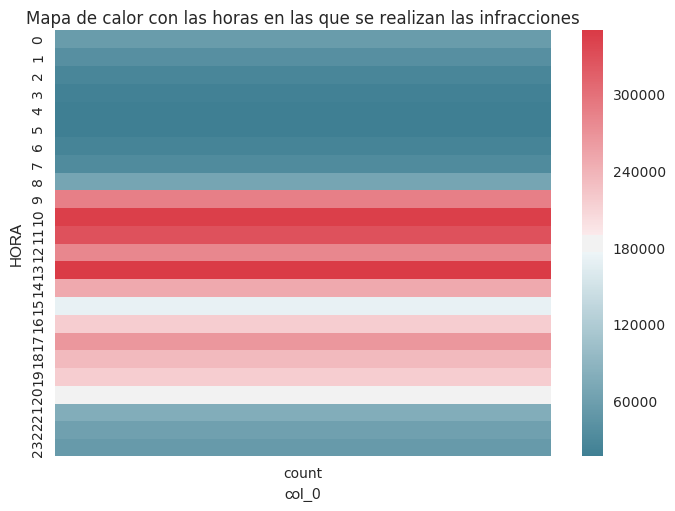

In [36]:
print "Hora en la que se registran más multas"
print pd.crosstab(index=data_multas["HORA"], columns = "count")
print "-------------------------------"
print "Porcentaje de horas en las que registran más multas"
print (pd.crosstab(index=data_multas["HORA"], columns = "count")/len(data_multas) * 100)

#Importamos seaborn
import seaborn as sns
plt.title("Mapa de calor con las horas en las que se realizan las infracciones")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.crosstab(index=data_multas["HORA"], columns = "count"), cmap=cmap)
plt.show()

Como podemos comprobar parte de ellas pertenecen a las consideradas hora punta de Madrid. Sin embargo, la mayor cantidad de infracciones se producen por la mañana concretamente entre las 10 y 14.

Historicamente, en Madrid la autopista M-30 es un punto en el que siempre se producen una gran cantidad de infracciones, vamos a ver en qué tramo de la autopista se producen más infracciones. Para ello primeramente obtendremos todas las apariciones de M-30 en el data frame.

In [37]:
#Buscamos 'M-30' en todo el data frame
def find_m30(data):
    return "M-30" in data

#Aplicamos la función al data frame con una nueva columna
data_multas["M30"] = data_multas["LUGAR"].apply(lambda x:find_m30(x))

#Obtenemos sólo las ocurrencias
data_multas_m30 = data_multas[data_multas["M30"] == True]

#Mostramos los tramos de la M-30 en los que se han producido infracciones
pd.crosstab(index=data_multas_m30["HECHO-BOL"], columns = "count")

col_0,count
HECHO-BOL,
"CIRCULAR CON UN CAMI�N DE M.M.A. SUPERIOR A 7,5 TN POR LOS T�NELES DE LA CALLE 30.",9
CIRCULAR EN SENTIDO CONTRARIO AL AUTORIZADO.,1
CIRCULAR POR EL ARC�N SIN AUTORIZACI�N O JUSTIFICACI�N.,6
CIRCULAR SIN LA DEBIDA PRECAUCI�N.,1
CIRCULAR SIN RESPETAR LA DISTANCIA M�NIMA DE SEGURIDAD.,7
CONDUCCION NEGLIGENTE (ESPECIFICAR SUCINTAMENTE LA SITUACION),8
CONDUCCION NEGLIGENTE:,1
CONDUCCION NEGLIGENTE: NO ENTRAR LO ANTES POSIBLE EN EL CARRIL DE DECELERACION AL ABANDONAR UNA,1
CONDUCCION TEMERARIA (ESPECIFICAR SUCINTAMENTE LA SITUACION),1


Como podemos observar las infracciones por sobrepasar las velocidad máxima de 60Km/h superan el 98% de las infracciones. Finalmente podemos ver la media del importe que suponen las multas por cada mes.

In [38]:
media_meses = data_multas.groupby(['MES', 'IMP_BOL'], as_index=False).mean().groupby('MES')['IMP_BOL'].mean()
media_meses_df = pd.DataFrame(media_meses)

media_meses_df

,IMP_BOL
MES,
1,297.777778
2,297.777778
3,328.000000
4,297.777778
5,297.777778
6,297.777778
7,273.000000
8,273.000000
9,273.000000


Podemos ver que a pesar de que diciembre es el mes en el que más multas suceden, es marzo el mes en el que las infracciones alcanzan un mayor valor económico.